In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("song_data.csv")
df2 = pd.read_csv("triplets_file.csv")

In [3]:
df1.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006.0
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0.0


In [4]:
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281126 entries, 0 to 281125
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      281126 non-null  object 
 1   title        281122 non-null  object 
 2   release      281123 non-null  object 
 3   artist_name  281125 non-null  object 
 4   year         281125 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.7+ MB


In [6]:
df1.describe()

,year
count,281125.000000
mean,1031.793362
std,998.676707
min,0.000000
25%,0.000000
50%,1970.000000
75%,2002.000000
max,2011.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299316 entries, 0 to 299315
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       299316 non-null  object 
 1   song_id       299316 non-null  object 
 2   listen_count  299315 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.9+ MB


In [8]:
df2.describe()

,listen_count
count,299315.000000
mean,3.076592
std,6.573963
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,796.000000


In [9]:
df1["year"] = df1["year"].astype('Int64')
df1.rename(columns={"release": "album", "artist_name": "artist"}, inplace=True)
df1.head()

,song_id,title,album,artist,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [10]:
df2["listen_count"] = df2["listen_count"].astype('Int64')
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [11]:
df = pd.merge(df2, df1.drop_duplicates(["song_id"]), on='song_id', how='left')
df['song'] = df['artist'] + ' - ' + df['title']
df = df.drop(['title'], axis=1)
df = df.head(50000)
df.head()

,user_id,song_id,listen_count,album,artist,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,NaN,NaN,<NA>,NaN
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Flamenco Para Niños,Paco De Lucia,1976,Paco De Lucia - Entre Dos Aguas
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Graduation,Kanye West,2007,Kanye West - Stronger
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,NaN,NaN,<NA>,NaN
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,NaN,NaN,<NA>,NaN


In [12]:
print("Number of entries in each column:\n")
df.count()

Number of entries in each column:



user_id         50000
song_id         50000
listen_count    50000
album           14572
artist          14572
year            14572
song            14572
dtype: int64

In [13]:
print("Number of unique users: ", df.user_id.nunique(dropna = True))
print("Number of artists: ", df.artist.nunique(dropna=True))
print("Number of songs: ", df.song_id.nunique(dropna=True))

Number of unique users:  1879
Number of artists:  1397
Number of songs:  9370


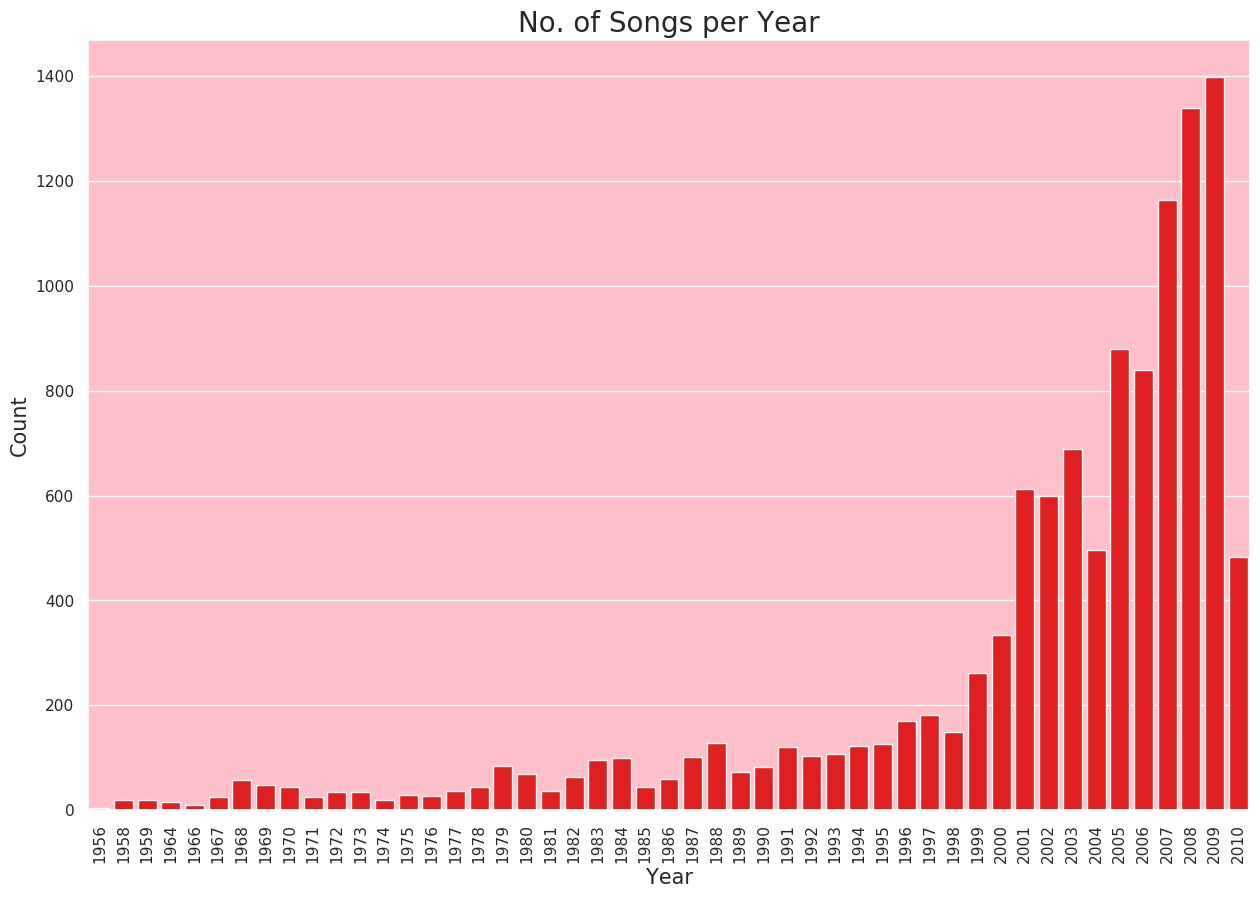

In [14]:
plt.figure(figsize=(15, 10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.countplot(x='year', data=df[-(df['year']==0)], color="red")
plt.xticks(rotation=90)
plt.title("No. of Songs per Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

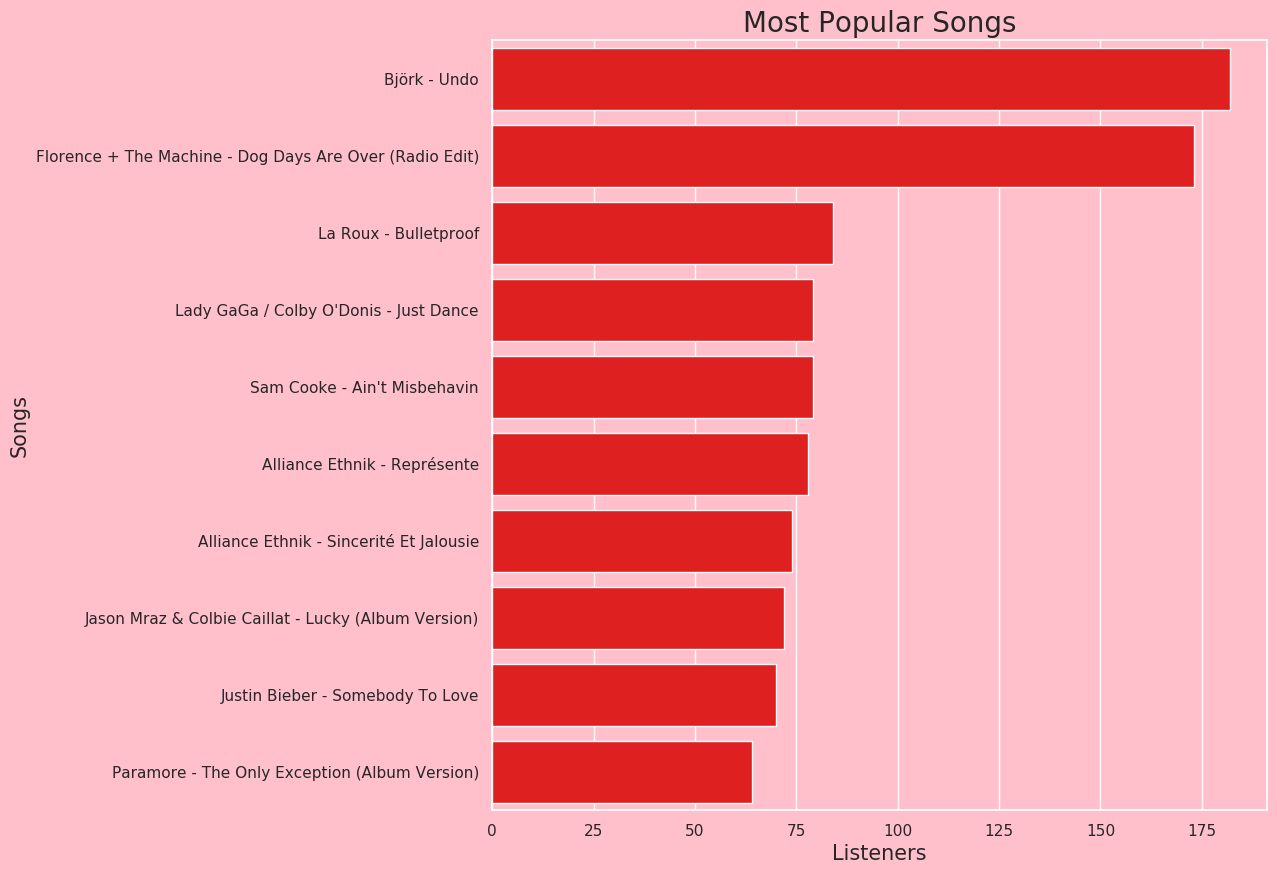

In [15]:
plt.figure(figsize=(10,10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.barplot(x = (df['song'].value_counts()[:10].values), y = (df['song'].value_counts()[:10].index), color="red")
plt.title('Most Popular Songs', fontsize=20)
plt.xlabel('Listeners', fontsize=15)
plt.ylabel('Songs', fontsize=15)
plt.show()

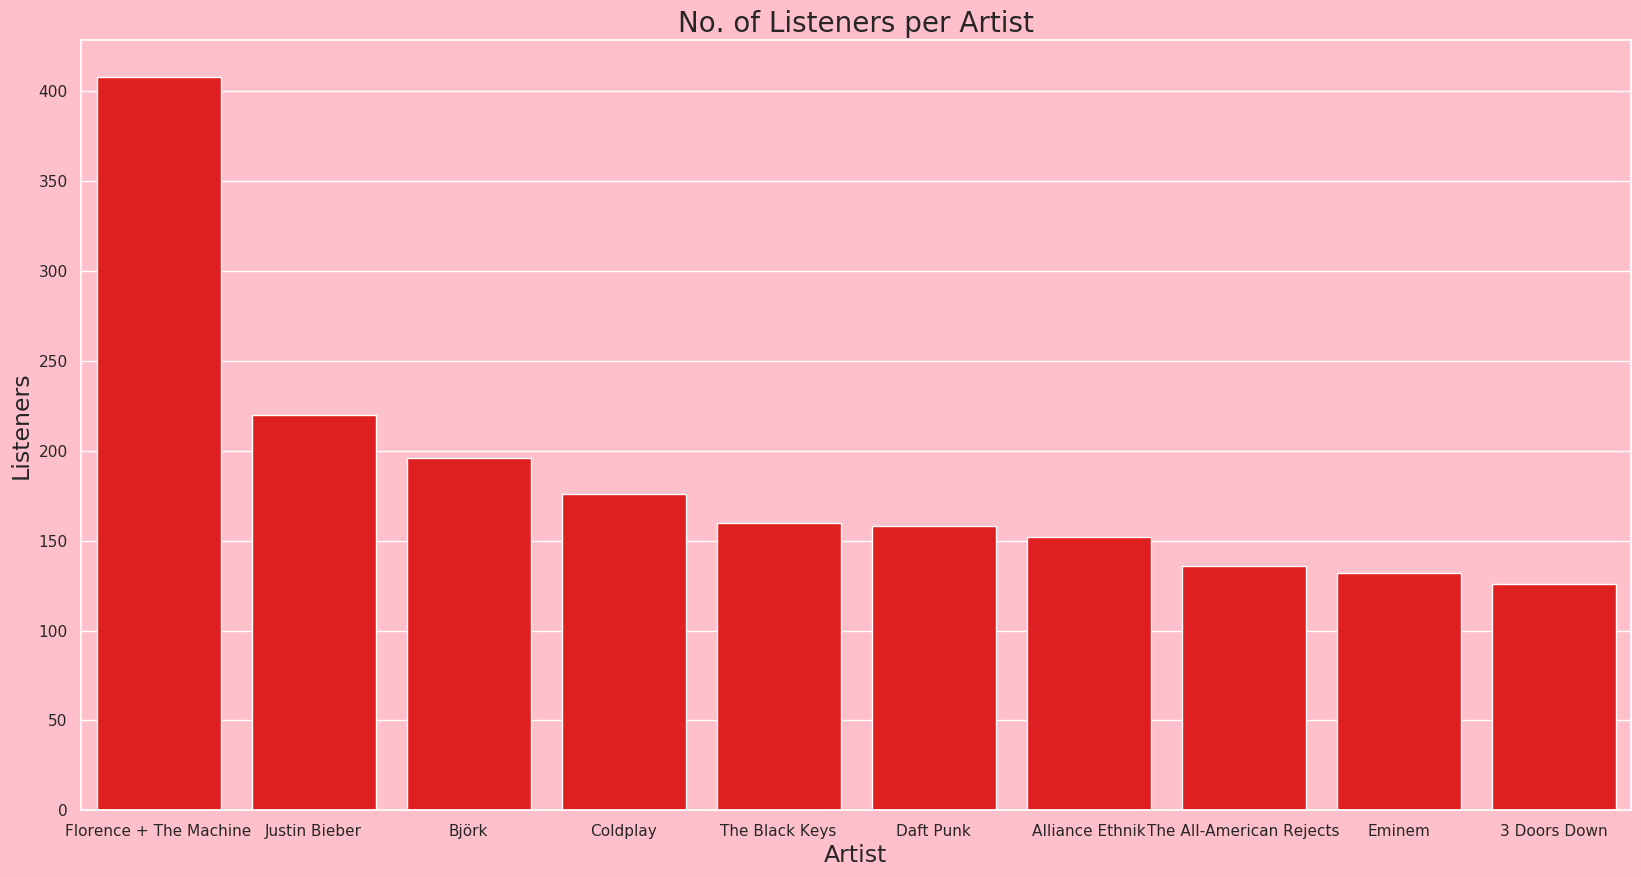

In [16]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.barplot(x = (df['artist'].value_counts()[:10].index), y = (df['artist'].value_counts()[:10].values), color="red")
plt.title('No. of Listeners per Artist', fontsize=20)
plt.xlabel('Artist', fontsize=17)
plt.ylabel('Listeners', fontsize=17)
plt.show()

In [17]:
class Engine():
    def __init__(self, data, user_id, song):
        self.data = data
        self.user_id = user_id
        self.song = song
        self.glcm = None
        
    def get_song_history(self, user):
        user_data = self.data[self.data[self.user_id] == user]
        return list(user_data[self.song].unique())
        
    def get_users(self, item):
        item_data = self.data[self.data[self.song] == item]
        return set(item_data[self.user_id].unique())
        
    def get_all_songs(self):
        return list(self.data[self.song].unique())
        
    def get_glcm(self, user_songs, all_songs):
        users = []        
        for i in range(0, len(user_songs)):
            users.append(self.get_users(user_songs[i]))   
        glcm = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        for i in range(0,len(all_songs)):
            songs_i_data = self.data[self.data[self.song] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):           
                users_j = users[j]
                users_intersection = users_i.intersection(users_j)
               
                users_union = users_i.union(users_j)
                glcm[j,i] = float(len(users_intersection))/float(len(users_union))

        return glcm

    def generate_recommendations(self, user, glcm, all_songs, user_songs):
        sim_scores = glcm.sum(axis=0)/float(glcm.shape[0])
        sim_scores = np.array(sim_scores)[0].tolist()
 
        sort_index = sorted(((e,i) for i,e in enumerate(list(sim_scores))), reverse=True)
        columns = ['UserID', 'Song', 'Score', 'Rank']
        df = pd.DataFrame(columns=columns)
         
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        print("Music Recommendations: \n")
        return df.drop(['UserID'], axis=1)

    def get_recommendations(self, user):
        user_songs = self.get_song_history(user)    
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations(user, glcm, all_songs, user_songs)

    def get_similar_songs(self, item_list):
        user_songs = item_list
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations("", glcm, all_songs, user_songs)

In [18]:
eng = Engine(df, 'user_id', 'song')
song_history = eng.get_song_history(df['user_id'][1001])

In [19]:
print("User Song History: \n")
for song in song_history:
    print(song)

User Song History: 

nan
Yeah Yeah Yeahs - Runaway
The Killers - Losing Touch
The Rural Alberta Advantage - Don't Haunt This Place
Florence + The Machine - Dog Days Are Over (Radio Edit)
Bright Eyes - At The Bottom Of Everything
Jason Mraz & Colbie Caillat - Lucky (Album Version)
Weezer - Island In The Sun
Adam Lambert - Whataya Want From Me
Justin Bieber - Somebody To Love
Rihanna - Rehab
The New Pornographers - Falling Through Your Clothes
Yeah Yeah Yeahs - Soft Shock
Plain White T's - Hey There Delilah
The New Pornographers - Execution Day
Bon Iver - re:stacks
Beirut - The Penalty
Cage The Elephant - Ain't No Rest For The Wicked (Original Version)
Stone Temple Pilots - Plush (Acoustic)
Damien Rice - Amie
LMFAO - Yes
Yeah Yeah Yeahs - Hysteric
The All-American Rejects - My Paper Heart
Alicia Keys - If I Ain't Got You
Tokyo Police Club - Tessellate
The Avett Brothers - The Weight Of Lies
M.I.A. - Paper Planes
The Strokes - You Only Live Once
Miley Cyrus - Party In The U.S.A.
MGMT - Ti

In [21]:
eng.get_similar_songs(['La Roux - Bulletproof'])

Music Recommendations: 



,Song,Score,Rank
0,Lady GaGa / Colby O'Donis - Just Dance,0.181159,1
1,Paramore - The Only Exception (Album Version),0.165354,2
2,Florence + The Machine - Dog Days Are Over (Ra...,0.162896,3
3,DJ Dizzy - Sexy Bitch,0.162162,4
4,Rise Against - Savior,0.154545,5
5,Florence + The Machine - You've Got The Love,0.153846,6
6,Beyoncé - Halo,0.147541,7
7,Jason Mraz & Colbie Caillat - Lucky (Album Ver...,0.147059,8
8,Florence + The Machine - Cosmic Love,0.142857,9
9,Justin Bieber - Somebody To Love,0.140741,10
